#### MODEL-02 Interpolation of noisy data under ridge regression using polynomial basis function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pi = np.pi

In [4]:
#step1:
def f(t): 
    return np.sin(t)
def f10(t):
    return np.sin(10*t)
function_list = [f,f10]              #NOTICE: FUNCTION HERE CAN BE SELECTED TO BO DIFFEREFNT WHEN TESTING

In [12]:
#step2:
D = 1000
x = np.linspace(0,2*pi,D)            #x
f_x = np.zeros(D)                    #f_x the real curve
for i in range(D):                   #make real curve
    f_x[i] = function_list[0](x[i])  #NOTICE: FUNCTION HERE CAN BE SELECTED TO BO DIFFEREFNT WHEN TESTING
                                     #Try to select the function_list[1] to see the difference!
index = list(range(D))               #index
shuffled_index = index.copy()        #deep copy
np.random.shuffle(shuffled_index)    #randomly shuffled index

In [13]:
#step3:
obs_noise_var = 0.1                  #variance
obs_noise_mean = 0                   #mean
N = 30                               #sample number
obs_index = shuffled_index[0:N]      #observed index
other_index = shuffled_index[N:D]    #hidden index
e = np.random.normal(obs_noise_mean,obs_noise_var**0.5,N)
                                     #random error~N

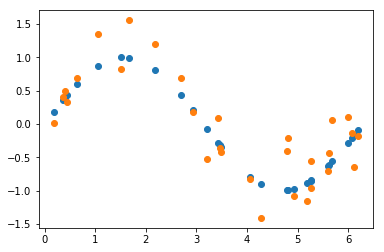

In [14]:
#step4:
A = np.zeros((N,D))                  #selection matrix A
for i in range(N):                   #produce A
    A[i,obs_index[i]] = 1
y = A.dot(f_x)                       #f(t) for chosen index
plt.plot(x[obs_index],y,'o')
y = y+e                              #f(t) after Gaussian
plt.plot(x[obs_index],y,'o')
plt.show()

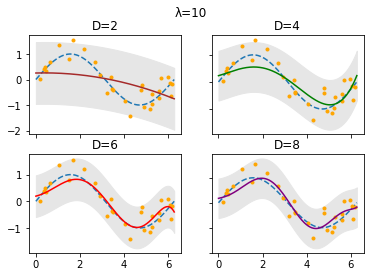

In [15]:
#lamda as parameter:
lamda_list = [0.01, 0.1, 1, 10]        #NOTICE: LAMDA HERE CAN BE SELECTED TO BO DIFFEREFNT VALUES WHEN TESTING
lamda = lamda_list[3]
sup_title = 'λ='+str(lamda)

#frame of the 2by2 figure:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle(sup_title)
for i in [ax1,ax2,ax3,ax4]:
    i.plot(x,f_x,'--')
    i.plot(x[obs_index],y,".",color="orange",linewidth=0.1)

#D=2:
X2 = np.zeros((N,3))
for i in range(N):
    X2[i,0] = 1
    X2[i,1] = x[obs_index[i]]
    X2[i,2] = x[obs_index[i]]**2
    
w2 = ((np.linalg.inv(lamda*np.eye(3)+(X2.T).dot(X2))).dot(X2.T)).dot(y)

x_test2 = np.zeros((D,3))
for i in range(D):
    x_test2[i,0] = 1
    x_test2[i,1] = x[i]
    x_test2[i,2] = x[i]**2

test2 = (w2.T).dot(x_test2.T)
ax1.plot(x,test2,color = 'brown')
ax1.set_title('D=2')
CI_1 = 1/(N-2)*(y-test2[obs_index]).T.dot(y-test2[obs_index])
ax1.fill_between(x,test2-1.96*CI_1**0.5,test2+1.96*CI_1**0.5,color=(0.9,0.9,0.9))

#D=4:
X4 = np.zeros((N,5))
for i in range(N):
    X4[i,0] = 1
    X4[i,1] = x[obs_index[i]]
    X4[i,2] = x[obs_index[i]]**2
    X4[i,3] = x[obs_index[i]]**3
    X4[i,4] = x[obs_index[i]]**4

w4 = ((np.linalg.inv(lamda*np.eye(5)+(X4.T).dot(X4))).dot(X4.T)).dot(y)

x_test4 = np.zeros((D,5))
for i in range(D):
    x_test4[i,0] = 1
    x_test4[i,1] = x[i]
    x_test4[i,2] = x[i]**2
    x_test4[i,3] = x[i]**3
    x_test4[i,4] = x[i]**4

test4 = (w4.T).dot(x_test4.T)
ax2.plot(x,test4,color = 'g')
ax2.set_title('D=4')
CI_2 = 1/(N-4)*(y-test4[obs_index]).T.dot(y-test4[obs_index])
ax2.fill_between(x,test4-1.96*CI_2**0.5,test4+1.96*CI_2**0.5,color=(0.9,0.9,0.9))

#D=6:
X6 = np.zeros((N,7))
for i in range(N):
    X6[i,0] = 1
    X6[i,1] = x[obs_index[i]]
    X6[i,2] = x[obs_index[i]]**2
    X6[i,3] = x[obs_index[i]]**3
    X6[i,4] = x[obs_index[i]]**4
    X6[i,5] = x[obs_index[i]]**5
    X6[i,6] = x[obs_index[i]]**6

w6 = ((np.linalg.inv(lamda*np.eye(7)+(X6.T).dot(X6))).dot(X6.T)).dot(y)

x_test6 = np.zeros((D,7))
for i in range(D):
    x_test6[i,0] = 1
    x_test6[i,1] = x[i]
    x_test6[i,2] = x[i]**2
    x_test6[i,3] = x[i]**3
    x_test6[i,4] = x[i]**4
    x_test6[i,5] = x[i]**5
    x_test6[i,6] = x[i]**6

test6 = (w6.T).dot(x_test6.T)
ax3.plot(x,test6,color = 'red')
ax3.set_title('D=6')
CI_3 = 1/(N-6)*(y-test6[obs_index]).T.dot(y-test6[obs_index])
ax3.fill_between(x,test6-1.96*CI_3**0.5,test6+1.96*CI_3**0.5,color=(0.9,0.9,0.9))

#D=8:
X8 = np.zeros((N,9))
for i in range(N):
    X8[i,0] = 1
    X8[i,1] = x[obs_index[i]]
    X8[i,2] = x[obs_index[i]]**2
    X8[i,3] = x[obs_index[i]]**3
    X8[i,4] = x[obs_index[i]]**4
    X8[i,5] = x[obs_index[i]]**5
    X8[i,6] = x[obs_index[i]]**6
    X8[i,7] = x[obs_index[i]]**7
    X8[i,8] = x[obs_index[i]]**8

w8 = ((np.linalg.inv(lamda*np.eye(9)+(X8.T).dot(X8))).dot(X8.T)).dot(y)

x_test8 = np.zeros((D,9))
for i in range(D):
    x_test8[i,0] = 1
    x_test8[i,1] = x[i]
    x_test8[i,2] = x[i]**2
    x_test8[i,3] = x[i]**3
    x_test8[i,4] = x[i]**4
    x_test8[i,5] = x[i]**5
    x_test8[i,6] = x[i]**6
    x_test8[i,7] = x[i]**7
    x_test8[i,8] = x[i]**8

test8 = (w8.T).dot(x_test8.T)
ax4.plot(x,test8,color = 'purple')
ax4.set_title('D=8')
CI_4 = 1/(N-8)*(y-test8[obs_index]).T.dot(y-test8[obs_index])
ax4.fill_between(x,test8-1.96*CI_4**0.5,test8+1.96*CI_4**0.5,color=(0.9,0.9,0.9))

#merge the plots in frame:
for ax in fig.get_axes():
    ax.label_outer()